In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score,classification_report,confusion_matrix,ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler,LabelEncoder
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB


In [44]:
iris = pd.read_csv("Iris.csv")
iris = iris.drop(['Id'],axis=1)
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [45]:
label = LabelEncoder()
species_trans = label.fit_transform(iris['Species'])
iris['Species'] = species_trans
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [46]:
X = iris.drop(['Species'],axis=1)
Y = iris['Species']

In [47]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=0,stratify=Y)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(120, 4) (30, 4) (120,) (30,)


In [48]:
scale = StandardScaler()
X_train_scaled = scale.fit_transform(X_train)
X_test_scaled = scale.transform(X_test)

In [49]:
list_1 = np.logspace(-10,3,14)
print(list_1)

[1.e-10 1.e-09 1.e-08 1.e-07 1.e-06 1.e-05 1.e-04 1.e-03 1.e-02 1.e-01
 1.e+00 1.e+01 1.e+02 1.e+03]


In [50]:

for i in list_1: 
    naive = GaussianNB(var_smoothing=i)
    
    naive.fit(X_train_scaled,Y_train)
    
    X_train_pred = naive.predict(X_train_scaled)
    train_accuracy = accuracy_score(Y_train,X_train_pred)
    
    X_test_pred = naive.predict(X_test_scaled)
    test_accuracy = accuracy_score(Y_test,X_test_pred)


    print(f"Var smoothing {i} --> Train : {train_accuracy}")
    print(f"Var smoothing {i} --> Test : {test_accuracy}")
    print("-" * 20)




Var smoothing 1e-10 --> Train : 0.95
Var smoothing 1e-10 --> Test : 0.9666666666666667
--------------------
Var smoothing 1e-09 --> Train : 0.95
Var smoothing 1e-09 --> Test : 0.9666666666666667
--------------------
Var smoothing 1e-08 --> Train : 0.95
Var smoothing 1e-08 --> Test : 0.9666666666666667
--------------------
Var smoothing 1e-07 --> Train : 0.95
Var smoothing 1e-07 --> Test : 0.9666666666666667
--------------------
Var smoothing 1e-06 --> Train : 0.95
Var smoothing 1e-06 --> Test : 0.9666666666666667
--------------------
Var smoothing 1e-05 --> Train : 0.95
Var smoothing 1e-05 --> Test : 0.9666666666666667
--------------------
Var smoothing 0.0001 --> Train : 0.95
Var smoothing 0.0001 --> Test : 0.9666666666666667
--------------------
Var smoothing 0.001 --> Train : 0.95
Var smoothing 0.001 --> Test : 0.9666666666666667
--------------------
Var smoothing 0.01 --> Train : 0.95
Var smoothing 0.01 --> Test : 0.9666666666666667
--------------------
Var smoothing 0.1 --> Train 

In [51]:
naive = GaussianNB(var_smoothing=0.01)

naive.fit(X_train_scaled,Y_train)

X_train_pred = naive.predict(X_train_scaled)
train_accuracy = accuracy_score(Y_train,X_train_pred)

X_test_pred = naive.predict(X_test_scaled)
test_accuracy = accuracy_score(Y_test,X_test_pred)


print(f"Var smoothing  {0.01}--> Train : {train_accuracy}")
print(f"Var smoothing {0.01} --> Test : {test_accuracy}")

Var smoothing  0.01--> Train : 0.95
Var smoothing 0.01 --> Test : 0.9666666666666667


In [52]:
print("Classification Report <--> Training Set : ")
print(classification_report(Y_train,X_train_pred,target_names=label.classes_))

print("Classification Report <--> Testing Set : ")
print(classification_report(Y_test,X_test_pred,target_names=label.classes_))

Classification Report <--> Training Set : 
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        40
Iris-versicolor       0.93      0.93      0.93        40
 Iris-virginica       0.93      0.93      0.93        40

       accuracy                           0.95       120
      macro avg       0.95      0.95      0.95       120
   weighted avg       0.95      0.95      0.95       120

Classification Report <--> Testing Set : 
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.91      1.00      0.95        10
 Iris-virginica       1.00      0.90      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



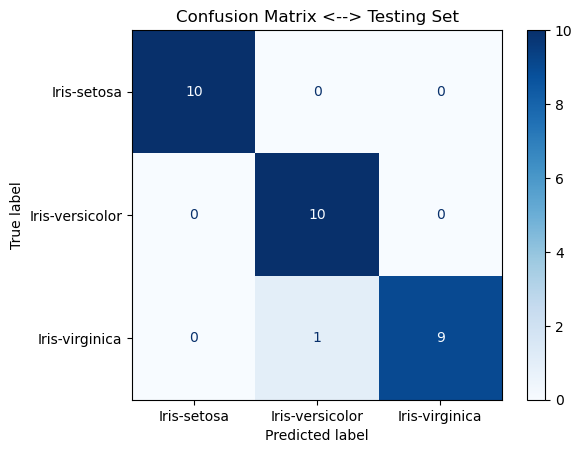

In [53]:
conf_matrix = confusion_matrix(Y_test,X_test_pred)
Matrix = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,display_labels=label.classes_)
Matrix.plot(cmap=plt.cm.Blues,values_format='d')
plt.title("Confusion Matrix <--> Testing Set")
plt.show()

# Hyperparameter tuning for Naive Bayes

In [54]:
param = {
    "var_smoothing" : np.logspace(-10,3,14)
}

In [60]:
grid_search = GridSearchCV(
    estimator = GaussianNB(),
    param_grid = param,
    cv = 10,
    scoring = "accuracy",
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train_scaled,Y_train)

Fitting 10 folds for each of 14 candidates, totalling 140 fits


GridSearchCV(cv=10, estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': array([1.e-10, 1.e-09, 1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03,
       1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])},
             scoring='accuracy', verbose=2)

In [61]:
print(f"Best parameters for Naive Bayes : {grid_search.best_params_}")
print(f"Best cross validation accuracy : {grid_search.best_score_}")

Best parameters for Naive Bayes : {'var_smoothing': 1e-10}
Best cross validation accuracy : 0.95


In [62]:
best_naive = grid_search.best_estimator_

X_train_pred_best = best_naive.predict(X_train_scaled)
X_test_pred_best = best_naive.predict(X_test_scaled)

train_accuracy_best = accuracy_score(Y_train, X_train_pred_best)
print(f"Train Accuracy with Best Parameters: {train_accuracy_best:.4f}")

test_accuracy_best = accuracy_score(Y_test, X_test_pred_best)
print(f"Test Accuracy with Best Parameters: {test_accuracy_best:.4f}")


Train Accuracy with Best Parameters: 0.9500
Test Accuracy with Best Parameters: 0.9667


In [63]:

print("Classification Report - Training Set (Best Estimator):")
print(classification_report(Y_train, X_train_pred_best, target_names=label.classes_))

print("Classification Report - Testing Set (Best Estimator):")
print(classification_report(Y_test, X_test_pred_best, target_names=label.classes_))

Classification Report - Training Set (Best Estimator):
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        40
Iris-versicolor       0.93      0.93      0.93        40
 Iris-virginica       0.93      0.93      0.93        40

       accuracy                           0.95       120
      macro avg       0.95      0.95      0.95       120
   weighted avg       0.95      0.95      0.95       120

Classification Report - Testing Set (Best Estimator):
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.91      1.00      0.95        10
 Iris-virginica       1.00      0.90      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



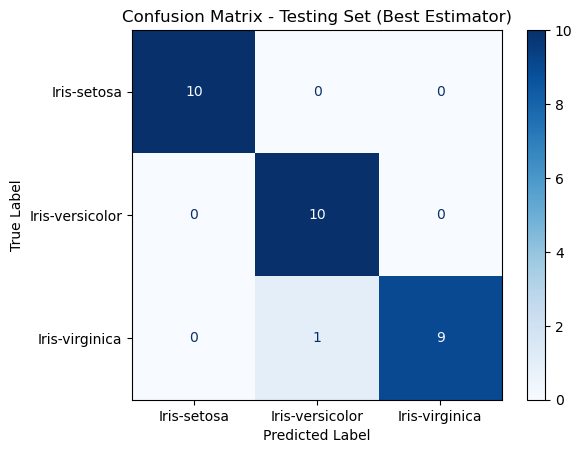

In [64]:

conf_mat_best = confusion_matrix(Y_test, X_test_pred_best)
Matrix_best = ConfusionMatrixDisplay(confusion_matrix=conf_mat_best, display_labels=label.classes_)
Matrix_best.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Confusion Matrix - Testing Set (Best Estimator)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
